<a id="top"></a>

    Just trying to figure out what's going on with all the data

# Bold Print Function

In [1]:
def print_bold(string):
    """
    Function to print strings in bold text.
    """
    print("\033[1m" + string + "\033[0m")

# Import Packages

In [2]:
import pandas as pd
import dask.dataframe as dd
import datetime
import matplotlib.pyplot as plt

In [3]:
import numpy as np

***

<a id="contents"></a>
# Contents

- [Import Data Files](#import_data_files)
- [What we have](#what_we_have)
- [Trips Data](#trips_data)
- [Vehicles Data](#vehicles_data)
- [Leave Times Data](#leave_times_data)
- [Single Route Analysis](#single_route_analysis)
- [Single Stop Analysis](#single_stop_analysis)
- [The Routes and Stops](#routes_and_stops)
- [Routes and Lines](#routes_and_lines)
    


<a id="import_data_files"></a>
# Import Data Files

In [4]:
# import each data file into a dataframe
df_trips = pd.read_csv('/home/faye/data/rt_trips_DB_2018.txt', sep=';',error_bad_lines=False)
df_vehicles = pd.read_csv('/home/faye/data/rt_vehicles_DB_2018.txt', sep=';',error_bad_lines=False)
#df_leavetimes = dd.read_csv('/home/faye/data/rt_leavetimes_DB_2018.txt', sep=';',error_bad_lines=False)

<a id="what_we_have"></a>
# What we have - and what we can get

### Vehicles
###### What we have
    The id of the bus
    The date a vehicle worked, how far it travelled, and how long it worked for
###### What we can get
    Average speed for the day?
    Average distance
***             
### Trips
##### What we have
    Date of a trip
    ID of; trip, line, route
    Direction of trip (inbound/outbound)
    Planned Arrival and Departure
    Actual Arrival and Departure
##### What we can get
    Average time of a trip
    A list of the routes we have data for
***  
### Leave Times
##### What we have
    Date of leave time
    ID of; trip, stoppoint, vehicle
    Position of stop in trip sequence
    Planned Arrival and Departure
    Actual Arrival and Departure
##### What we can get
    Planned Dwell time
    Actual Dwell time
    Average Dwell time for a stop
    Whether a bus was early, on-time, or late
    A list of the stops we have data for
    Travel time between stops

***

<a id="trips_data"></a>
# Trips Data

In [5]:
# print the number of rows and features in the trips dataset
num_rows = df_trips.shape[0]
features = df_trips.shape[1]
print(f"The dataset has {num_rows} rows with {features} features.")

The dataset has 2182637 rows with 16 features.


In [6]:
# print the feature names in this dataset
df_trips.keys()

Index(['DATASOURCE', 'DAYOFSERVICE', 'TRIPID', 'LINEID', 'ROUTEID',
       'DIRECTION', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'BASIN', 'TENDERLOT', 'SUPPRESSED', 'JUSTIFICATIONID',
       'LASTUPDATE', 'NOTE'],
      dtype='object')

In [7]:
# print the first 5 rows
df_trips.head(5)

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,07-FEB-18 00:00:00,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,07-FEB-18 00:00:00,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"


- DATASOURCE: unique bus operator code
- DAYOFSERVICE: date
- TRIPID: unique trip code
- LINEID: unique line code
- ROUTEID: unique route code
- DIRECTION: binary var (1 or 2), inbound/going/northbound/eastbound OR outbound/back/southbound/westbound
- PLANNEDTIME_ARR: planned arrival time of the trip (seconds)
- PLANNEDTIME_DEP: planned departure time of the trip (seconds)
- ACTUALTIME_ARR: actual arrival time of the trip (seconds)
- ACTUALTIME_DEP: actual departure time of the trip (seconds)
- BASIN: basin code??
- TENDERLOT: tender lot??
- SUPPRESSED: the whole trip has been suppressed (0 = achieved, 1 = suppressed)
- JUSTIFICATIONID: fault code

In [8]:
# print the unique values of the dayofservice feature
df_trips['DAYOFSERVICE'].unique()

array(['07-FEB-18 00:00:00', '18-FEB-18 00:00:00', '16-MAR-18 00:00:00',
       '27-MAR-18 00:00:00', '11-MAR-18 00:00:00', '28-SEP-18 00:00:00',
       '26-SEP-18 00:00:00', '26-JUN-18 00:00:00', '21-JUN-18 00:00:00',
       '10-OCT-18 00:00:00', '11-OCT-18 00:00:00', '11-APR-18 00:00:00',
       '10-MAR-18 00:00:00', '20-SEP-18 00:00:00', '29-SEP-18 00:00:00',
       '22-JUN-18 00:00:00', '31-DEC-18 00:00:00', '07-JUL-18 00:00:00',
       '08-JUL-18 00:00:00', '24-SEP-18 00:00:00', '02-DEC-18 00:00:00',
       '09-JUL-18 00:00:00', '15-JUN-18 00:00:00', '16-OCT-18 00:00:00',
       '10-APR-18 00:00:00', '04-JUL-18 00:00:00', '12-APR-18 00:00:00',
       '30-DEC-18 00:00:00', '09-APR-18 00:00:00', '16-FEB-18 00:00:00',
       '21-FEB-18 00:00:00', '03-FEB-18 00:00:00', '12-FEB-18 00:00:00',
       '04-FEB-18 00:00:00', '22-MAR-18 00:00:00', '10-JUL-18 00:00:00',
       '20-APR-18 00:00:00', '19-JUN-18 00:00:00', '16-APR-18 00:00:00',
       '08-FEB-18 00:00:00', '28-OCT-18 00:00:00', 

In [9]:
# print the unique values of the direction feature
df_trips['DIRECTION'].unique()

array([1, 2])

In [10]:
# print the unique values of the basin feature
df_trips['BASIN'].unique()

array(['BasDef'], dtype=object)

In [11]:
# print the unique values of the tenderlot feature
df_trips['TENDERLOT'].unique()

array([nan])

In [12]:
# print the unique values of the suppressed feature
df_trips['SUPPRESSED'].unique()

array([nan,  0.])

In [13]:
# print the value counts of the suppressed feature values
df_trips['SUPPRESSED'].value_counts()

0.0    4333
Name: SUPPRESSED, dtype: int64

- 4333 of the trips were achieved?, missing data for the rest

In [14]:
# print the unique values of the justificationid feature
df_trips['JUSTIFICATIONID'].unique()

array([    nan, 194642., 205589., ..., 231826., 231813., 231765.])

 - BASIN and TENDERLOT seemed redundant
 - not sure whats going on with SUPPRESSED

<a id="vehicles_data"></a>
# Vehicles Data

In [15]:
# print the number of rows and features in the vehicles dataset
num_rows = df_vehicles.shape[0]
features = df_vehicles.shape[1]
print(f"The dataset has {num_rows} rows with {features} features.")

The dataset has 272622 rows with 7 features.


In [16]:
# print the first 5 rows
df_vehicles.head(5)

,DATASOURCE,DAYOFSERVICE,VEHICLEID,DISTANCE,MINUTES,LASTUPDATE,NOTE
0,DB,23-NOV-18 00:00:00,3303848,286166,58849,04-DEC-18 08:03:09,NaN
1,DB,23-NOV-18 00:00:00,3303847,259545,56828,04-DEC-18 08:03:09,NaN
2,DB,28-FEB-18 00:00:00,2868329,103096,40967,08-MAR-18 10:35:59,NaN
3,DB,28-FEB-18 00:00:00,2868330,147277,43599,08-MAR-18 10:35:59,NaN
4,DB,28-FEB-18 00:00:00,2868331,224682,40447,08-MAR-18 10:35:59,NaN


- DISTANCE: distance travelled by the vehicle in this day
- MINUTES: time worked by the vehicle in the corresponding day

In [17]:
# Find and print the number of duplicate rows
df = df_vehicles
num_duplicate_rows = df.duplicated().sum()
print(f"There are {num_duplicate_rows} duplicated rows in this dataset (excluding the first row).")
num_duplicate_rows_inclusive = df[df.duplicated(keep=False)].shape[0]
print(f"There are {num_duplicate_rows_inclusive} duplicated rows in this dataset (including row that is duplicated).")

There are 0 duplicated rows in this dataset (excluding the first row).
There are 0 duplicated rows in this dataset (including row that is duplicated).


<a id="leave_times_data"></a>
# Leave Times Data

In [3]:
# loaded it in with pandas, took awhile but worked? hope I haven't killed the server...
t1 = datetime.datetime.now()
df_leavetimes = pd.read_csv('/home/faye/data/rt_leavetimes_DB_2018.txt', sep=';',error_bad_lines=False)
diff = datetime.datetime.now() - t1
print(f"Time to read: {diff}")

Time to read: 0:02:56.392553


##### Save the df in a feather file

In [4]:
df_leavetimes.to_feather('/home/faye/data/leavetimes.feather')

In [ ]:
# load it in using feather file format
t1 = datetime.datetime.now()
df_feather = pd.read_feather('/home/faye/data/leavetimes.feather')
diff = datetime.datetime.now() - t1
print(f"Time to read: {diff}")

***

In [18]:
# print the number of rows and features in the leavetimes dataset
num_rows = df_leavetimes.shape[0]
features = df_leavetimes.shape[1]
print(f"The dataset has {num_rows} rows with {features} features.")

The dataset has 116949113 rows with 18 features.


In [19]:
# print the features of the dataset
df_leavetimes.keys()

Index(['DATASOURCE', 'DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID',
       'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'VEHICLEID', 'PASSENGERS', 'PASSENGERSIN',
       'PASSENGERSOUT', 'DISTANCE', 'SUPPRESSED', 'JUSTIFICATIONID',
       'LASTUPDATE', 'NOTE'],
      dtype='object')

In [20]:
#print the first 5 rows
df_leavetimes.head(5)

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,01-JAN-18 00:00:00,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
1,DB,01-JAN-18 00:00:00,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
2,DB,01-JAN-18 00:00:00,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
3,DB,01-JAN-18 00:00:00,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
4,DB,01-JAN-18 00:00:00,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN


- DAYOFSERVICE: date
- TRIPID: unique trip code - there will be multiple trips in one route so it is used to differentiate each trip
- PROGRNUMBER: sequential position of the stop point in the trip - shows how far a specific route has gone
- STOPPOINTID: unique stop point code - might be number on the stop?
- PLANNEDTIME_ARR: planned arrival time at the stop point (seconds)
- PLANNEDTIME_DEP: planned departure time from the stop point (seconds)
- ACTUALTIME_ARR: actual arrival time at the stop point (seconds)
- ACTUALTIME_DEP: actual departure time from the stop point (seconds)
- VEHICLEID: unique vehicle code arriving at this stop point
- PASSENGERS: num of passengers on board
- PASSENGERSIN: num of boarded passengers
- PASSENGERSOUT: num of descended passengers
- DISTANCE: distance measured from the beginning of the trip
- SUPPRESSED: when the trip is partially suppressed it says that the previous link is suppressed (0 = achieved, 1 = suppressed)
- JUSTIFICATIONID: fault code

In [21]:
# print the unique values of the datasource feature
df_leavetimes['DATASOURCE'].unique()

array(['DB'], dtype=object)

In [22]:
# print the unique values of the supressed feature
df_leavetimes['SUPPRESSED'].unique()

array([nan,  1.,  0.])

In [23]:
# print the value count of the suppressed feature values
df_leavetimes['SUPPRESSED'].value_counts()

0.0    438942
1.0    149718
Name: SUPPRESSED, dtype: int64

In [24]:
# print the unique values of the note feature
df_leavetimes['NOTE'].unique()

array([nan])

In [25]:
# print the unique values of the distance feature
df_leavetimes['DISTANCE'].unique()

array([nan])

In [26]:
# print the unique values of the passengers feature
df_leavetimes['PASSENGERS'].unique()

array([nan])

<a id="single_route_analysis"></a>
# Single Route Analysis
[back to contents](#contents)

    Going to take a look at a single route.

In [27]:
# print the first 3 rows of the trips dataset
df_trips.head(3)

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,07-FEB-18 00:00:00,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,07-FEB-18 00:00:00,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"


In [28]:
# print the first 3 rows of the vehicles dataset
df_vehicles.head(3)

,DATASOURCE,DAYOFSERVICE,VEHICLEID,DISTANCE,MINUTES,LASTUPDATE,NOTE
0,DB,23-NOV-18 00:00:00,3303848,286166,58849,04-DEC-18 08:03:09,NaN
1,DB,23-NOV-18 00:00:00,3303847,259545,56828,04-DEC-18 08:03:09,NaN
2,DB,28-FEB-18 00:00:00,2868329,103096,40967,08-MAR-18 10:35:59,NaN


In [29]:
# print the first 3 rows of the leavetimes dataset
df_leavetimes.head(3)

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,01-JAN-18 00:00:00,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
1,DB,01-JAN-18 00:00:00,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
2,DB,01-JAN-18 00:00:00,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN


## The Trip
[top of section](#single_route_analysis)

    Going to go with trip 6262138

In [30]:
# make a new df of entries with only that trip id
df_single_route = df_trips[df_trips['TRIPID'] == 6262138]
df_single_route

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
1,DB,07-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
140264,DB,15-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30016.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 13:51:50,",2580260,"
222674,DB,16-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30117.0,26382.0,BasDef,NaN,NaN,NaN,26-FEB-18 12:19:30,",2580260,"
562075,DB,14-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30580.0,26578.0,BasDef,NaN,NaN,NaN,15-MAR-18 12:47:59,",2580260,"
1057230,DB,08-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30475.0,26373.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:20:01,",2580260,"
1192237,DB,05-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30796.0,26432.0,BasDef,NaN,NaN,NaN,28-FEB-18 11:29:31,",2580260,"
1310647,DB,09-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30922.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:32:51,",2580260,"
1554930,DB,12-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30587.0,25962.0,BasDef,NaN,NaN,NaN,28-FEB-18 13:18:29,",2580260,"
1578863,DB,13-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30532.0,26422.0,BasDef,NaN,NaN,NaN,28-FEB-18 13:29:11,",2580260,"
1615634,DB,06-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,31289.0,26653.0,BasDef,NaN,NaN,NaN,28-FEB-18 11:48:21,",2580260,"


    Turns out the 'unique trip code' is not so unique? It's used on many different days
    I'll go with one day from that selection, the 14th <3
- Over the different days does the same trip service the same stops?

In [31]:
# remove all other dates except 14th feb from the df
df_single_route = df_single_route[df_single_route['DAYOFSERVICE'] == '14-FEB-18 00:00:00']
df_single_route

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
562075,DB,14-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30580.0,26578.0,BasDef,NaN,NaN,NaN,15-MAR-18 12:47:59,",2580260,"


In [32]:
# drop seemingly redundant columns
redundant_columns = ['DATASOURCE', 'BASIN', 'TENDERLOT', 'JUSTIFICATIONID', 'LASTUPDATE']
df_single_route = df_single_route.drop(columns=redundant_columns)
df_single_route

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,NOTE
562075,14-FEB-18 00:00:00,6262138,25B,25B_271,2,30517,26460,30580.0,26578.0,NaN,",2580260,"


### Convert the Arr and Dep times to HH:MM:SS

In [33]:
# convert the time for planned arrival time (testing it works)
for time in df_single_route['PLANNEDTIME_ARR']:
    #print(time)
    df_single_route['PLANNEDTIME_ARR'] = str(datetime.timedelta(seconds=time))

In [34]:
# display the dataframe
df_single_route

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,NOTE
562075,14-FEB-18 00:00:00,6262138,25B,25B_271,2,8:28:37,26460,30580.0,26578.0,NaN,",2580260,"


In [35]:
# convert the other times
for time in df_single_route['PLANNEDTIME_DEP']:
    #print(time)
    df_single_route['PLANNEDTIME_DEP'] = str(datetime.timedelta(seconds=time))

for time in df_single_route['ACTUALTIME_ARR']:
    #print(time)
    df_single_route['ACTUALTIME_ARR'] = str(datetime.timedelta(seconds=time))
    
for time in df_single_route['ACTUALTIME_DEP']:
    #print(time)
    df_single_route['ACTUALTIME_DEP'] = str(datetime.timedelta(seconds=time))

In [36]:
# display the dataframe
df_single_route

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,NOTE
562075,14-FEB-18 00:00:00,6262138,25B,25B_271,2,8:28:37,7:21:00,8:29:40,7:22:58,NaN,",2580260,"


In [37]:
# reordering the columns
cols = ['DAYOFSERVICE', 'TRIPID', 'LINEID', 'ROUTEID', 'DIRECTION',
       'PLANNEDTIME_ARR','ACTUALTIME_ARR', 'PLANNEDTIME_DEP', 
       'ACTUALTIME_DEP', 'SUPPRESSED', 'NOTE']

In [38]:
df_single_route[cols]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,ACTUALTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_DEP,SUPPRESSED,NOTE
562075,14-FEB-18 00:00:00,6262138,25B,25B_271,2,8:28:37,8:29:40,7:21:00,7:22:58,NaN,",2580260,"


    So it arrives at 08:29 and departs at 07:22? Or does it depart at 07:22 and arrive at 08:29? Which comes first?
    EDIT: leaves at 07:22 and arrives at 08:29, 
   [see here](#see_here_1)

In [39]:
cols = ['DAYOFSERVICE', 'TRIPID', 'LINEID', 'ROUTEID', 'DIRECTION',
        'PLANNEDTIME_DEP', 'ACTUALTIME_DEP', 'PLANNEDTIME_ARR', 
        'ACTUALTIME_ARR', 'SUPPRESSED', 'NOTE']
df_single_route[cols]

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_DEP,ACTUALTIME_DEP,PLANNEDTIME_ARR,ACTUALTIME_ARR,SUPPRESSED,NOTE
562075,14-FEB-18 00:00:00,6262138,25B,25B_271,2,7:21:00,7:22:58,8:28:37,8:29:40,NaN,",2580260,"


## The Leave Times
[top of section](#single_route_analysis)

In [40]:
# make a new df of entries with only that trip id
df_single_route_leavetimes = df_leavetimes[df_leavetimes['TRIPID'] == 6262138]
df_single_route_leavetimes = df_single_route_leavetimes[df_single_route_leavetimes['DAYOFSERVICE'] == '14-FEB-18 00:00:00']
df_single_route_leavetimes

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
18558367,DB,14-FEB-18 00:00:00,6262138,6,3368,26988,26988,26930,26952,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18558402,DB,14-FEB-18 00:00:00,6262138,37,406,30212,30212,30194,30218,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18558437,DB,14-FEB-18 00:00:00,6262138,38,4530,30343,30343,30340,30354,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18563006,DB,14-FEB-18 00:00:00,6262138,7,7137,27107,27107,27053,27082,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18563118,DB,14-FEB-18 00:00:00,6262138,40,7390,30517,30517,30580,30580,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18567705,DB,14-FEB-18 00:00:00,6262138,10,4619,27467,27467,27324,27324,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18572362,DB,14-FEB-18 00:00:00,6262138,12,4629,27591,27591,27440,27440,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18577066,DB,14-FEB-18 00:00:00,6262138,14,4631,27748,27748,27578,27601,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18581809,DB,14-FEB-18 00:00:00,6262138,16,5164,27866,27866,27770,27770,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18586557,DB,14-FEB-18 00:00:00,6262138,18,2234,28142,28142,27982,28015,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN


In [41]:
# only going to keep these columns
cols = ['DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID',
       'PLANNEDTIME_ARR','ACTUALTIME_ARR', 'PLANNEDTIME_DEP', 
       'ACTUALTIME_DEP', 'VEHICLEID']

# removing all the passenger featues as there is nothing there for this instance

In [42]:
# keep only useful columns
df_single_route_leavetimes = df_single_route_leavetimes[cols]
df_single_route_leavetimes

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_DEP,VEHICLEID
18558367,14-FEB-18 00:00:00,6262138,6,3368,26988,26930,26988,26952,1001208
18558402,14-FEB-18 00:00:00,6262138,37,406,30212,30194,30212,30218,1001208
18558437,14-FEB-18 00:00:00,6262138,38,4530,30343,30340,30343,30354,1001208
18563006,14-FEB-18 00:00:00,6262138,7,7137,27107,27053,27107,27082,1001208
18563118,14-FEB-18 00:00:00,6262138,40,7390,30517,30580,30517,30580,1001208
18567705,14-FEB-18 00:00:00,6262138,10,4619,27467,27324,27467,27324,1001208
18572362,14-FEB-18 00:00:00,6262138,12,4629,27591,27440,27591,27440,1001208
18577066,14-FEB-18 00:00:00,6262138,14,4631,27748,27578,27748,27601,1001208
18581809,14-FEB-18 00:00:00,6262138,16,5164,27866,27770,27866,27770,1001208
18586557,14-FEB-18 00:00:00,6262138,18,2234,28142,27982,28142,28015,1001208


In [43]:
# sort by prognumber (position of stop in the trip)
df_single_route_leavetimes = df_single_route_leavetimes.sort_values(by='PROGRNUMBER', ascending=True)
df_single_route_leavetimes

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_DEP,VEHICLEID
18624465,14-FEB-18 00:00:00,6262138,1,6290,26460,26578,26460,26578,1001208
18624494,14-FEB-18 00:00:00,6262138,2,7120,26578,26655,26578,26664,1001208
18655787,14-FEB-18 00:00:00,6262138,3,7119,26645,26697,26645,26706,1001208
18629277,14-FEB-18 00:00:00,6262138,4,7127,26700,26757,26700,26757,1001208
18655788,14-FEB-18 00:00:00,6262138,5,7143,26792,26799,26792,26799,1001208
18558367,14-FEB-18 00:00:00,6262138,6,3368,26988,26930,26988,26952,1001208
18563006,14-FEB-18 00:00:00,6262138,7,7137,27107,27053,27107,27082,1001208
18655789,14-FEB-18 00:00:00,6262138,8,7139,27243,27132,27243,27164,1001208
18655790,14-FEB-18 00:00:00,6262138,9,4623,27384,27222,27384,27281,1001208
18567705,14-FEB-18 00:00:00,6262138,10,4619,27467,27324,27467,27324,1001208


In [44]:
# create list of time columns
time_cols = [
    'PLANNEDTIME_ARR','ACTUALTIME_ARR',
    'PLANNEDTIME_DEP','ACTUALTIME_DEP'
]

In [45]:
# convert all time columns to HH:MM:SS
# definitely a better way of doing this
for col in time_cols:
    for i in df_single_route_leavetimes.index:
        sec = int(df_single_route_leavetimes[col][i])
        time = str(datetime.timedelta(seconds=sec))
        df_single_route_leavetimes[col][i] = time

/home/faye/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/faye/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<a id="see_here_1"></a>

In [46]:
df_single_route_leavetimes

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_DEP,VEHICLEID
18624465,14-FEB-18 00:00:00,6262138,1,6290,7:21:00,7:22:58,7:21:00,7:22:58,1001208
18624494,14-FEB-18 00:00:00,6262138,2,7120,7:22:58,7:24:15,7:22:58,7:24:24,1001208
18655787,14-FEB-18 00:00:00,6262138,3,7119,7:24:05,7:24:57,7:24:05,7:25:06,1001208
18629277,14-FEB-18 00:00:00,6262138,4,7127,7:25:00,7:25:57,7:25:00,7:25:57,1001208
18655788,14-FEB-18 00:00:00,6262138,5,7143,7:26:32,7:26:39,7:26:32,7:26:39,1001208
18558367,14-FEB-18 00:00:00,6262138,6,3368,7:29:48,7:28:50,7:29:48,7:29:12,1001208
18563006,14-FEB-18 00:00:00,6262138,7,7137,7:31:47,7:30:53,7:31:47,7:31:22,1001208
18655789,14-FEB-18 00:00:00,6262138,8,7139,7:34:03,7:32:12,7:34:03,7:32:44,1001208
18655790,14-FEB-18 00:00:00,6262138,9,4623,7:36:24,7:33:42,7:36:24,7:34:41,1001208
18567705,14-FEB-18 00:00:00,6262138,10,4619,7:37:47,7:35:24,7:37:47,7:35:24,1001208


## The Vehicle 
[top of section](#single_route_analysis)

    So the vehicle used for this specific trip has the id: 1001208

In [47]:
# get the vehicle that ran on this day with id 1001208
df_single_trip_vehicle = df_vehicles[df_vehicles['DAYOFSERVICE'] == '14-FEB-18 00:00:00']
df_single_trip_vehicle = df_single_trip_vehicle[df_single_trip_vehicle['VEHICLEID'] == 1001208]
df_single_trip_vehicle

,DATASOURCE,DAYOFSERVICE,VEHICLEID,DISTANCE,MINUTES,LASTUPDATE,NOTE
52796,DB,14-FEB-18 00:00:00,1001208,91298,38933,15-MAR-18 12:47:59,NaN


In [48]:
# assuming the minutes column is actually in unit seconds, convert into HH:MM:SS
str(datetime.timedelta(seconds=38933))

'10:48:53'

    If we assume that the minutes column is actually in seconds this would mean that this particular bus on this route on 
    this day was working for 10hrs and 48mins

    Looking at the leavetimes data it arrived at the first stop at 07:22 and arrived at the last stop at 08:29.
    That's only an hour? I must be missing something here

In [49]:
# create new dataframe of all leave times on the 14 Feb
test = df_leavetimes[df_leavetimes['DAYOFSERVICE'] == '14-FEB-18 00:00:00']
test

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
18410098,DB,14-FEB-18 00:00:00,6245980,12,2473,32187,32187,32304,32304,2868311,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18410099,DB,14-FEB-18 00:00:00,6254312,12,2473,70648,70648,70100,70100,2172260,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18410100,DB,14-FEB-18 00:00:00,6245986,12,2473,67048,67048,68938,68938,2172306,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18410101,DB,14-FEB-18 00:00:00,6249281,12,2473,72448,72448,72339,72339,2868311,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18410102,DB,14-FEB-18 00:00:00,6248555,12,2473,69748,69748,71057,71076,2172263,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19356599,DB,14-FEB-18 00:00:00,6252185,57,2418,74413,74413,74564,74574,2172313,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
19356600,DB,14-FEB-18 00:00:00,6254320,58,2419,81054,81054,81868,81883,2172273,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
19356601,DB,14-FEB-18 00:00:00,6262369,58,2419,36490,36490,37618,37633,2868368,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
19356602,DB,14-FEB-18 00:00:00,6257298,58,2419,49218,49218,49928,49940,2693286,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN


In [50]:
# print how many vehicles operated on this day
len(test['VEHICLEID'].unique())

893

In [51]:
# filter dataframe to contain only the leave times for vehicle of id 1001208
test = test[test['VEHICLEID'] == 1001208]
test

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
18558367,DB,14-FEB-18 00:00:00,6262138,6,3368,26988,26988,26930,26952,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18558402,DB,14-FEB-18 00:00:00,6262138,37,406,30212,30212,30194,30218,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18558437,DB,14-FEB-18 00:00:00,6262138,38,4530,30343,30343,30340,30354,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18563006,DB,14-FEB-18 00:00:00,6262138,7,7137,27107,27107,27053,27082,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
18563118,DB,14-FEB-18 00:00:00,6262138,40,7390,30517,30517,30580,30580,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19331285,DB,14-FEB-18 00:00:00,6262138,15,4632,27795,27795,27693,27740,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
19333950,DB,14-FEB-18 00:00:00,6253650,24,7587,61164,61164,60952,60965,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
19333953,DB,14-FEB-18 00:00:00,6253650,39,2216,63236,63236,62985,62991,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN
19333954,DB,14-FEB-18 00:00:00,6253650,44,3365,63493,63493,63258,63270,1001208,NaN,NaN,NaN,NaN,NaN,NaN,15-MAR-18 12:47:59,NaN


In [52]:
# print all of the trips this vehicle took on this day
test['TRIPID'].unique()

array([6262138, 6253650])

    So the bus does 2 trips on this day. Is it back and forth on the same route?

In [53]:
# create a new dataframe of all the trips with the second trip id that took place on the 14 Feb
test2 = df_trips[df_trips['TRIPID'] == 6253650]
test2 = test2[test2['DAYOFSERVICE'] == '14-FEB-18 00:00:00']
test2 = test2.drop(columns=['DATASOURCE','BASIN','TENDERLOT','TENDERLOT','LASTUPDATE']) # drop redundant columns

# convert all the time columns into HH:MM:SS
for col in time_cols:
    for i in test2.index:
        sec = int(test2[col][i])
        time = str(datetime.timedelta(seconds=sec))
        test2[col][i] = time

# display dataframe
test2

/home/faye/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/faye/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,JUSTIFICATIONID,NOTE
1644116,14-FEB-18 00:00:00,6253650,25X,25X_7,1,17:44:12,16:30:00,17:41:04,16:29:34,NaN,NaN,",3094669,"


In [54]:
# display single route dataframe
df_single_route

,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,NOTE
562075,14-FEB-18 00:00:00,6262138,25B,25B_271,2,8:28:37,7:21:00,8:29:40,7:22:58,NaN,",2580260,"


    So these two trips go in different directions which would make sense if the same bus was going back and forth along the route.
    However, both trips last only about an hour each, this doesn't add up to the ~10hrs that we assume the bus supposedly 
    worked on that day.

***

<a id="single_stop_analysis"></a>
# Single Stop Analysis
[back to contents](#contents)

    Going to take one stop and try to analyse it across all given dates.
    Looking at Stop 119 (first to come up).

In [55]:
# create a new df with only Stop 119
df_sstop = df_leavetimes[df_leavetimes['STOPPOINTID'] == 119]
df_sstop

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,01-JAN-18 00:00:00,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
1,DB,01-JAN-18 00:00:00,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
2,DB,01-JAN-18 00:00:00,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
3,DB,01-JAN-18 00:00:00,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
4,DB,01-JAN-18 00:00:00,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116923474,DB,31-DEC-18 00:00:00,8579542,11,119,41995,41995,42079,42093,3370452,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN
116923475,DB,31-DEC-18 00:00:00,8578310,11,119,38395,38395,38437,38453,3393878,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN
116923476,DB,31-DEC-18 00:00:00,8578308,11,119,27540,27540,27618,27618,3393878,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN
116930217,DB,31-DEC-18 00:00:00,8576997,85,119,34080,34080,34445,34458,2693256,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN


In [56]:
# reorder and drop empty features
df_sstop = df_sstop[['DAYOFSERVICE','TRIPID','PROGRNUMBER','STOPPOINTID','PLANNEDTIME_ARR','ACTUALTIME_ARR',
                     'PLANNEDTIME_DEP','ACTUALTIME_DEP','VEHICLEID','SUPPRESSED','JUSTIFICATIONID']]

In [57]:
# display dataframe
df_sstop

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID
0,01-JAN-18 00:00:00,5972116,12,119,48030,48012,48030,48012,2693211,NaN,NaN
1,01-JAN-18 00:00:00,5966674,12,119,54001,54023,54001,54023,2693267,NaN,NaN
2,01-JAN-18 00:00:00,5959105,12,119,60001,59955,60001,59955,2693263,NaN,NaN
3,01-JAN-18 00:00:00,5966888,12,119,58801,58771,58801,58771,2693284,NaN,NaN
4,01-JAN-18 00:00:00,5965960,12,119,56401,56309,56401,56323,2693209,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
116923474,31-DEC-18 00:00:00,8579542,11,119,41995,42079,41995,42093,3370452,NaN,NaN
116923475,31-DEC-18 00:00:00,8578310,11,119,38395,38437,38395,38453,3393878,NaN,NaN
116923476,31-DEC-18 00:00:00,8578308,11,119,27540,27618,27540,27618,3393878,NaN,NaN
116930217,31-DEC-18 00:00:00,8576997,85,119,34080,34445,34080,34458,2693256,NaN,NaN


In [58]:
# add new features: PLANNEDTIME_DWELL and ACTUALTIME_DWELL
# PLANNEDTIME_DWELL = PLANNEDTIME_DEP - PLANNEDTIME_ARR
# ACTUALTIME_DWELL = ACTUALTIME_DEP - ACTUALTIME_ARR

time = datetime.datetime.now()

# for each row calculate planned dwell time and actual dwell time and insert into dwell df
for row in df_sstop.index:
    df_sstop.loc[row, 'PLANNEDTIME_DWELL'] = int(df_sstop.loc[row, 'PLANNEDTIME_DEP'] - df_sstop.loc[row, 'PLANNEDTIME_ARR'])
    df_sstop.loc[row, 'ACTUALTIME_DWELL'] = int(df_sstop.loc[row, 'ACTUALTIME_DEP'] - df_sstop.loc[row, 'ACTUALTIME_ARR'])

print(f"Time taken: {datetime.datetime.now() - time}")

/home/faye/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/faye/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Time taken: 0:02:25.810977


In [59]:
# print first 5 rows of dataframe
df_sstop.head(5)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,PLANNEDTIME_DWELL,ACTUALTIME_DWELL
0,01-JAN-18 00:00:00,5972116,12,119,48030,48012,48030,48012,2693211,NaN,NaN,0.0,0.0
1,01-JAN-18 00:00:00,5966674,12,119,54001,54023,54001,54023,2693267,NaN,NaN,0.0,0.0
2,01-JAN-18 00:00:00,5959105,12,119,60001,59955,60001,59955,2693263,NaN,NaN,0.0,0.0
3,01-JAN-18 00:00:00,5966888,12,119,58801,58771,58801,58771,2693284,NaN,NaN,0.0,0.0
4,01-JAN-18 00:00:00,5965960,12,119,56401,56309,56401,56323,2693209,NaN,NaN,0.0,14.0


In [60]:
# descriptive stats for actual dwell time
df_sstop['ACTUALTIME_DWELL'].describe()

count    104165.000000
mean         10.961139
std          22.480613
min           0.000000
25%           0.000000
50%          10.000000
75%          17.000000
max        3722.000000
Name: ACTUALTIME_DWELL, dtype: float64

In [61]:
# convert day of service feature to datetime object
df_sstop['DAYOFSERVICE'] = df_sstop['DAYOFSERVICE'].astype('datetime64')

/home/faye/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
# display dataframe
df_sstop

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,PLANNEDTIME_DWELL,ACTUALTIME_DWELL
0,2018-01-01,5972116,12,119,48030,48012,48030,48012,2693211,NaN,NaN,0.0,0.0
1,2018-01-01,5966674,12,119,54001,54023,54001,54023,2693267,NaN,NaN,0.0,0.0
2,2018-01-01,5959105,12,119,60001,59955,60001,59955,2693263,NaN,NaN,0.0,0.0
3,2018-01-01,5966888,12,119,58801,58771,58801,58771,2693284,NaN,NaN,0.0,0.0
4,2018-01-01,5965960,12,119,56401,56309,56401,56323,2693209,NaN,NaN,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116923474,2018-12-31,8579542,11,119,41995,42079,41995,42093,3370452,NaN,NaN,0.0,14.0
116923475,2018-12-31,8578310,11,119,38395,38437,38395,38453,3393878,NaN,NaN,0.0,16.0
116923476,2018-12-31,8578308,11,119,27540,27618,27540,27618,3393878,NaN,NaN,0.0,0.0
116930217,2018-12-31,8576997,85,119,34080,34445,34080,34458,2693256,NaN,NaN,0.0,13.0


In [63]:
# create features: DAYOFWEEK
for row in df_sstop.index:
    df_sstop.loc[row,'DAYOFWEEK'] = df_sstop.loc[row,'DAYOFSERVICE'].isoweekday()

/home/faye/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/faye/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [64]:
# print first 10 rows of dataframe
df_sstop.head(10)

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,PLANNEDTIME_DWELL,ACTUALTIME_DWELL,DAYOFWEEK
0,2018-01-01,5972116,12,119,48030,48012,48030,48012,2693211,NaN,NaN,0.0,0.0,1.0
1,2018-01-01,5966674,12,119,54001,54023,54001,54023,2693267,NaN,NaN,0.0,0.0,1.0
2,2018-01-01,5959105,12,119,60001,59955,60001,59955,2693263,NaN,NaN,0.0,0.0,1.0
3,2018-01-01,5966888,12,119,58801,58771,58801,58771,2693284,NaN,NaN,0.0,0.0,1.0
4,2018-01-01,5965960,12,119,56401,56309,56401,56323,2693209,NaN,NaN,0.0,14.0,1.0
5,2018-01-01,5965964,12,119,70688,70663,70688,70679,2693209,NaN,NaN,0.0,16.0,1.0
6,2018-01-01,5958117,12,119,72488,72539,72488,72539,2172293,NaN,NaN,0.0,0.0,1.0
7,2018-01-01,5959109,12,119,74288,74173,74288,74173,2693263,NaN,NaN,0.0,0.0,1.0
8,2018-01-01,5972114,12,119,40187,40096,40187,40111,2693211,NaN,NaN,0.0,15.0,1.0
9,2018-01-01,5959099,12,119,38387,38271,38387,38271,2693263,NaN,NaN,0.0,0.0,1.0


In [65]:
# group dwell time by day of the week
df_days = df_sstop['ACTUALTIME_DWELL'].groupby(df_sstop['DAYOFWEEK'])

In [66]:
# print mean daily dwell time
print(df_days.mean())

DAYOFWEEK
1.0    10.381008
2.0    10.782186
3.0    11.387323
4.0    11.587957
5.0    11.630559
6.0    10.863279
7.0     9.498513
Name: ACTUALTIME_DWELL, dtype: float64


/home/faye/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


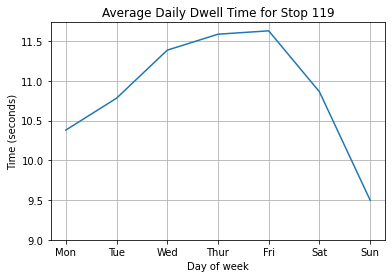

In [67]:
# plot average daily dwell time against dayofweek
fig = plt.figure()
ax = plt.axes()

ax.plot(df_days.mean())

ax.set_ylim(bottom=9)

#ax.yaxis.set_minor_locator(plt.MaxNLocator(10))

week = ["","Mon","Tue","Wed","Thur","Fri","Sat","Sun"]
ax.xaxis.set_major_formatter(plt.FixedFormatter(week))

plt.title("Average Daily Dwell Time for Stop 119")
plt.ylabel("Time (seconds)")
plt.xlabel("Day of week")

plt.grid(which='both')

plt.show()

    Other ways to graph:
        Avg daily dwell time per month
        Avg daily dwell time per season?

In [68]:
# convert time columns to datetime
time_cols = ['PLANNEDTIME_ARR', 'ACTUALTIME_ARR', 'PLANNEDTIME_DEP',
             'ACTUALTIME_DEP','PLANNEDTIME_DWELL', 'ACTUALTIME_DWELL']

start_time = datetime.datetime.now()

"""
for i in df_sstop.index:
    for col in time_cols:
        #sec = int(test2[col][i])
        #time = datetime.timedelta(seconds=sec)
        #test2[col][i] = time
        sec = int(df_sstop.loc[i,col])
        df_sstop.loc[i, col] = datetime.timedelta(seconds=sec)
"""
        
# convert all the time columns into HH:MM:SS
for col in time_cols:
    for i in df_sstop.index:
        sec = int(df_sstop[col][i])
        time = str(datetime.timedelta(seconds=sec))
        df_sstop[col][i] = time

print(f"Time taken: {datetime.datetime.now() - start_time}")

/home/faye/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/faye/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/faye/.local/lib/python3.6/site-packages/pandas/core/series.py:1009: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[key] = value
/home/faye/.local

Time taken: 0:05:17.989343


In [69]:
# display dataframe
df_sstop

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,ACTUALTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,PLANNEDTIME_DWELL,ACTUALTIME_DWELL,DAYOFWEEK
0,2018-01-01,5972116,12,119,13:20:30,13:20:12,13:20:30,13:20:12,2693211,NaN,NaN,0:00:00,0:00:00,1.0
1,2018-01-01,5966674,12,119,15:00:01,15:00:23,15:00:01,15:00:23,2693267,NaN,NaN,0:00:00,0:00:00,1.0
2,2018-01-01,5959105,12,119,16:40:01,16:39:15,16:40:01,16:39:15,2693263,NaN,NaN,0:00:00,0:00:00,1.0
3,2018-01-01,5966888,12,119,16:20:01,16:19:31,16:20:01,16:19:31,2693284,NaN,NaN,0:00:00,0:00:00,1.0
4,2018-01-01,5965960,12,119,15:40:01,15:38:29,15:40:01,15:38:43,2693209,NaN,NaN,0:00:00,0:00:14,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116923474,2018-12-31,8579542,11,119,11:39:55,11:41:19,11:39:55,11:41:33,3370452,NaN,NaN,0:00:00,0:00:14,1.0
116923475,2018-12-31,8578310,11,119,10:39:55,10:40:37,10:39:55,10:40:53,3393878,NaN,NaN,0:00:00,0:00:16,1.0
116923476,2018-12-31,8578308,11,119,7:39:00,7:40:18,7:39:00,7:40:18,3393878,NaN,NaN,0:00:00,0:00:00,1.0
116930217,2018-12-31,8576997,85,119,9:28:00,9:34:05,9:28:00,9:34:18,2693256,NaN,NaN,0:00:00,0:00:13,1.0


***

<a id="routes_and_stops"></a>
# The Routes and Stops
[back to contents](#contents)

    Going to look at all the routes and stops that we have data for.

### The Routes

##### RouteID

In [70]:
# create a routes array of all the unique route ids
all_routes = df_trips['ROUTEID'].unique()

In [71]:
# sort the array
all_routes.sort()

In [72]:
# print the array
print(all_routes)

['102_10' '102_8' '102_9' '104_15' '104_16' '111_10' '111_7' '111_8'
 '111_9' '114_5' '114_6' '116_1' '116_3' '118_3' '118_4' '11_40' '11_41'
 '11_42' '11_43' '120_10' '120_11' '120_12' '120_13' '120_7' '120_8'
 '120_9' '122_14' '122_15' '122_16' '122_17' '122_18' '122_19' '122_20'
 '122_21' '123_34' '123_35' '123_36' '123_37' '130_10' '130_11' '13_28'
 '13_60' '13_61' '13_62' '13_63' '13_64' '13_65' '13_66' '13_67' '13_68'
 '13_69' '13_70' '13_71' '13_72' '13_73' '13_74' '13_75' '13_76' '140_16'
 '140_19' '140_20' '140_21' '140_22' '142_10' '142_12' '142_13' '142_8'
 '142_9' '145_102' '145_104' '145_105' '145_106' '145_107' '145_108'
 '145_86' '145_87' '145_88' '145_89' '145_91' '145_93' '145_94' '145_95'
 '145_99' '14C_10' '14C_17' '14C_18' '14_12' '14_13' '14_15' '14_16'
 '150_10' '150_8' '150_9' '151_15' '151_16' '151_17' '151_18' '151_19'
 '15A_83' '15A_84' '15A_85' '15B_56' '15B_60' '15B_61' '15B_64' '15D_62'
 '15D_63' '15D_65' '15_10' '15_16' '15_17' '15_18' '15_19' '15_20'
 '16

In [73]:
# print the number of routes we have
print(f"We have data for {len(all_routes)} routes.")

We have data for 588 routes.


##### LineID

In [74]:
# create a routes array of all the unique route ids
all_lines = df_trips['LINEID'].unique()

# sort the array
all_lines.sort()

# print the array
print(all_lines)

# print the number of routes we have
print(f"We have data for {len(all_lines)} lines.")

['1' '102' '104' '11' '111' '114' '116' '118' '120' '122' '123' '13' '130'
 '14' '140' '142' '145' '14C' '15' '150' '151' '15A' '15B' '15D' '16'
 '161' '16C' '16D' '17' '17A' '18' '184' '185' '220' '236' '238' '239'
 '25' '25A' '25B' '25D' '25X' '26' '27' '270' '27A' '27B' '27X' '29A' '31'
 '31A' '31B' '31D' '32' '32X' '33' '33A' '33B' '33D' '33E' '33X' '37' '38'
 '38A' '38B' '38D' '39' '39A' '39X' '4' '40' '40B' '40D' '40E' '41' '41A'
 '41B' '41C' '41D' '41X' '42' '42D' '43' '44' '44B' '45A' '46A' '46E' '47'
 '49' '51D' '51X' '53' '54A' '56A' '59' '61' '63' '65' '65B' '66' '66A'
 '66B' '66X' '67' '67X' '68' '68A' '68X' '69' '69X' '7' '70' '70D' '75'
 '76' '76A' '77A' '77X' '79' '79A' '7A' '7B' '7D' '83' '83A' '84' '84A'
 '84X' '9']
We have data for 130 lines.


##### TripID

In [75]:
# create a routes array of all the unique route ids
all_trips = df_trips['TRIPID'].unique()

# sort the array
all_trips.sort()

# print the array
print(all_trips)

# print the number of routes we have
print(f"We have data for {len(all_trips)} trips.")

[5955221 5955222 5955223 ... 8592205 8592206 8592207]
We have data for 658964 trips.


    So we have data for:
- 588 different routes
- 130 different lines
- 658,964 different trips

    From what we see above it seem that:
    We have a list of lines.
    And each line has a list of routes.
        For example: line 84A has routes: 84A_1, 84A_2, 84A_3, 84A_4
+ Do we then have various trips for each route?

### The Stops
[Top of section](#routes_and_stops)

In [76]:
# create an array of all the unique stop ids
all_stops = df_leavetimes['STOPPOINTID'].unique()

In [77]:
# sort the array
all_stops.sort()

In [78]:
# print the array
print(all_stops)

[   2    3    4 ... 7690 7691 7692]


In [79]:
# print the number of stops we have data for
print(f"We have data for {len(all_stops)} stops.")

We have data for 4774 stops.


    In the GTFS Bus Stop data for January 2018 there are 4,690 rows. If we 
    take each row to be a stop this means in our given data we have 84 
    extra stops.
    From the GTFS analysis it also appears that there were 1,526 changes to 
    the stops over the course of 2018.

In [1]:
all_stops

NameError: name 'all_stops' is not defined

***

<a id="routes_and_lines"></a>
# Routes and Lines
[Back to contents](#contents)

- Link routes to lines

- What do the '_X' routeID numbers mean?

    So we know we have 130 lines and each of these has a number of routes 
    of which we have 588

In [80]:
all_lines.sort()

In [81]:
all_lines

array(['1', '102', '104', '11', '111', '114', '116', '118', '120', '122',
       '123', '13', '130', '14', '140', '142', '145', '14C', '15', '150',
       '151', '15A', '15B', '15D', '16', '161', '16C', '16D', '17', '17A',
       '18', '184', '185', '220', '236', '238', '239', '25', '25A', '25B',
       '25D', '25X', '26', '27', '270', '27A', '27B', '27X', '29A', '31',
       '31A', '31B', '31D', '32', '32X', '33', '33A', '33B', '33D', '33E',
       '33X', '37', '38', '38A', '38B', '38D', '39', '39A', '39X', '4',
       '40', '40B', '40D', '40E', '41', '41A', '41B', '41C', '41D', '41X',
       '42', '42D', '43', '44', '44B', '45A', '46A', '46E', '47', '49',
       '51D', '51X', '53', '54A', '56A', '59', '61', '63', '65', '65B',
       '66', '66A', '66B', '66X', '67', '67X', '68', '68A', '68X', '69',
       '69X', '7', '70', '70D', '75', '76', '76A', '77A', '77X', '79',
       '79A', '7A', '7B', '7D', '83', '83A', '84', '84A', '84X', '9'],
      dtype=object)

In [82]:
all_routes.sort()

In [83]:
all_routes

array(['102_10', '102_8', '102_9', '104_15', '104_16', '111_10', '111_7',
       '111_8', '111_9', '114_5', '114_6', '116_1', '116_3', '118_3',
       '118_4', '11_40', '11_41', '11_42', '11_43', '120_10', '120_11',
       '120_12', '120_13', '120_7', '120_8', '120_9', '122_14', '122_15',
       '122_16', '122_17', '122_18', '122_19', '122_20', '122_21',
       '123_34', '123_35', '123_36', '123_37', '130_10', '130_11',
       '13_28', '13_60', '13_61', '13_62', '13_63', '13_64', '13_65',
       '13_66', '13_67', '13_68', '13_69', '13_70', '13_71', '13_72',
       '13_73', '13_74', '13_75', '13_76', '140_16', '140_19', '140_20',
       '140_21', '140_22', '142_10', '142_12', '142_13', '142_8', '142_9',
       '145_102', '145_104', '145_105', '145_106', '145_107', '145_108',
       '145_86', '145_87', '145_88', '145_89', '145_91', '145_93',
       '145_94', '145_95', '145_99', '14C_10', '14C_17', '14C_18',
       '14_12', '14_13', '14_15', '14_16', '150_10', '150_8', '150_9',
       '15

In [84]:
# split all_routes and create new dataframe with features line and route

In [85]:
# create new dataframe using all_routes array
df_lines_routes = pd.DataFrame(all_routes, columns=["line_route"])

In [86]:
# print first 5 rows
df_lines_routes.head(5)

,line_route
0,102_10
1,102_8
2,102_9
3,104_15
4,104_16


In [88]:
#arr = txt.split()

In [97]:
# split routeID into line number and route? number
split_arr = df_lines_routes['line_route'].str.split("_")

In [102]:
# create new df using the split array
df_split = pd.DataFrame(split_arr.array, columns=['line','route'])

In [103]:
df_split

,line,route
0,102,10
1,102,8
2,102,9
3,104,15
4,104,16
...,...,...
583,84,32
584,9,5
585,9,6
586,9,7


In [105]:
# add the df_split features into df_lines_routes
df_lines_routes[['line','route']] = df_split

In [111]:
# print first 5 rows
df_lines_routes.head(5)

,line_route,line,route
0,102_10,102,10
1,102_8,102,8
2,102_9,102,9
3,104_15,104,15
4,104_16,104,16


In [112]:
# save df_lines_routes to csv file
df_lines_routes.to_csv("/home/faye/data/lines_and_routes.csv")

***

<a id="line_46A"></a>
# Extract Line 46A - (the meaty one)
[Back to contents](#contents)

In [116]:
# filter the lines and routes by line 46A
df_lines_routes[df_lines_routes['line'] == '46A']

,line_route,line,route
383,46A_62,46A,62
384,46A_63,46A,63
385,46A_64,46A,64
386,46A_65,46A,65
387,46A_66,46A,66
388,46A_67,46A,67
389,46A_68,46A,68
390,46A_69,46A,69
391,46A_70,46A,70
392,46A_71,46A,71


In [120]:
# print the number of routes for line 46A
num = df_lines_routes[df_lines_routes['line'] == '46A'].shape[0]
print(f"There are {num} different routes for line 46A")

There are 14 different routes for line 46A


***

- Is a tripID unique to a line/route?
- Does a tripID always service the same stops?
- Avg number of trips per day

***

   End of notebook : [Back to top](#top)